In [37]:
import cv2
import numpy as np
from PIL import Image
import queue
import matplotlib.pyplot as plt
from heapq import heappop, heappush
import math

In [2]:
class Vertex:
    def __init__(self,x_coordinate,y_coordinate):
        self.x = x_coordinate
        self.y = y_coordinate
        self.xParent = None
        self.yParent = None
        self.processed = False
        self.queueIndex = None
        self.condition = None

In [3]:
def get_neighbors(mat, r, c):
    shape=mat.shape
    neighbors=[]
    #ensure neighbors are within image boundaries
    if r > 0 and not mat[r-1][c].processed and not mat[r-1][c].condition ==0:
        neighbors.append(mat[r-1][c])
    if r < shape[0] - 1 and not mat[r+1][c].processed and not mat[r+1][c].condition ==0:
        neighbors.append(mat[r+1][c])
    if c > 0 and not mat[r][c-1].processed and not mat[r][c-1].condition ==0:
        neighbors.append(mat[r][c-1])
    if c < shape[1] - 1 and not mat[r][c+1].processed and not mat[r][c+1].condition == 0:
        neighbors.append(mat[r][c+1])
    return neighbors

In [4]:
def path_from(matrix, x, y, xS, yS):
    path = []
    iter_v=matrix[y][x]
    path.append((x,y))
    while(iter_v.y!=yS or iter_v.x!=xS):
        path.append((iter_v.x,iter_v.y))
        iter_v=matrix[iter_v.yParent][iter_v.xParent]
    path.append((xS,yS))
    return path

In [39]:
def heuristic(cell, goal):
    #return abs(cell[0] - goal[0]) + abs(cell[1] - goal[1])
    return math.sqrt(abs(cell[0] - goal[0])**2 + abs(cell[1] - goal[1])**2)

In [30]:
def find_shortest_path_astar(matrix, x_start, y_start, x_end, y_end):
    #assuming start and end are withing bounds
    #let 0 be black (can't visit)
    #let 1 be white (can visit)
    lenrows, lencols = matrix.shape
    print('rows', lenrows)
    print('cols', lencols)
    vectorMatrix = np.full((lenrows, lencols), None)
    for r in range(lenrows):
        for c in range(lencols):
            #print(matrix[0][0])
            vectorMatrix[r][c] = Vertex(c, r)
            vectorMatrix[r][c].condition = matrix[r][c]
    #vectorMatrix[y_start][x_start].condition = -1
    vectorMatrix[y_end][x_end].condition = -2
    
    #changes for a*
    start = (x_start, y_start)
    goal = (x_end, y_end)
    pr_queue = []
    #path = []
    #path.append(start)
    heappush(pr_queue, (0 + heuristic(start, goal), 0, "", start))
    visited = set()
    while pr_queue:
        _, cost, path, current = heappop(pr_queue)
        print('currently on node: ' + str(current))
        #print('current path: ', path)
        if current == goal:
            print('found')
            return path
        if current in visited:
            continue
        visited.add(current)
        neighbors = get_neighbors(vectorMatrix, current[0], current[1])
        for neighbor in neighbors:
            #print('neighbor: '+ str(neighbor.x) + ' , ' + str(neighbor.y))
            heappush(pr_queue, (cost + heuristic((neighbor.x, neighbor.y), goal), cost+1, path + str((neighbor.x, neighbor.y)) + ',', (neighbor.x, neighbor.y)))
    
    return "no way"

In [7]:
def draw_path(img,path, thickness=2):
    '''path is a list of (x,y) tuples'''
    print('drawing path')
    x0,y0=path[0]
    for vertex in path[1:]:
        #print(vertex)
        x1,y1=vertex
        cv2.line(img,(x0,y0),(x1,y1),(0,0,255),thickness)
        x0,y0=vertex

In [8]:
def cv2_to_PIL(image):
    return Image.fromarray(image)

In [9]:
def solve_maze_astar(image: str, x_start, y_start, x_end, y_end):
    image_array = cv2.imread(image, 0)
    ret,thresh1 = cv2.threshold(image_array,127,255,cv2.THRESH_BINARY)
    return find_shortest_path_astar(thresh1, x_start, y_start, x_end, y_end)
#     image_array_color = cv2.imread(image,1)
#     draw_path(image_array_color, find_shortest_path_bfs(thresh1, x_start, y_start, x_end, y_end), 6)
#     cv2.circle(image_array_color, (x_start, y_start), 5, (0,200,40), -1)
#     cv2.circle(image_array_color, (x_end, y_end), 5, (255,0,0), -1)
#     return cv2_to_PIL(image_array_color)

In [10]:
def solve_maze_bfs(image: str, x_start, y_start, x_end, y_end):
    image_array = cv2.imread(image, 0)
    ret,thresh1 = cv2.threshold(image_array,127,255,cv2.THRESH_BINARY)
    image_array_color = cv2.imread(image,1)
    draw_path(image_array_color, find_shortest_path_bfs(thresh1, x_start, y_start, x_end, y_end), 6)
    cv2.circle(image_array_color, (x_start, y_start), 5, (0,200,40), -1)
    cv2.circle(image_array_color, (x_end, y_end), 5, (255,0,0), -1)
    return cv2_to_PIL(image_array_color)

In [11]:
path = solve_maze_astar()

TypeError: solve_maze_astar() missing 5 required positional arguments: 'image', 'x_start', 'y_start', 'x_end', and 'y_end'

In [40]:
solve = solve_maze_astar('maze_images/simple_maze2.png', 25, 25, 367,250)
solve

rows 253
cols 389
currently on node: (25, 25)
currently on node: (26, 25)
currently on node: (25, 26)
currently on node: (27, 25)
currently on node: (26, 26)
currently on node: (26, 26)
currently on node: (27, 26)
currently on node: (25, 27)
currently on node: (28, 25)
currently on node: (27, 26)
currently on node: (26, 27)
currently on node: (28, 26)
currently on node: (26, 27)
currently on node: (27, 27)
currently on node: (27, 27)
currently on node: (25, 28)
currently on node: (29, 25)
currently on node: (28, 26)
currently on node: (28, 27)
currently on node: (26, 28)
currently on node: (29, 26)
currently on node: (28, 27)
currently on node: (26, 28)
currently on node: (25, 24)
currently on node: (27, 28)
currently on node: (29, 27)
currently on node: (27, 28)
currently on node: (26, 24)
currently on node: (25, 29)
currently on node: (30, 25)
currently on node: (29, 26)
currently on node: (24, 25)
currently on node: (26, 24)
currently on node: (28, 28)
currently on node: (28, 28)
cu

currently on node: (26, 48)
currently on node: (36, 45)
currently on node: (36, 45)
currently on node: (23, 19)
currently on node: (23, 19)
currently on node: (22, 41)
currently on node: (42, 22)
currently on node: (41, 23)
currently on node: (41, 21)
currently on node: (40, 22)
currently on node: (22, 41)
currently on node: (30, 51)
currently on node: (52, 30)
currently on node: (51, 31)
currently on node: (51, 29)
currently on node: (50, 30)
currently on node: (30, 51)
currently on node: (33, 46)
currently on node: (33, 46)
currently on node: (20, 29)
currently on node: (20, 29)
currently on node: (19, 25)
currently on node: (19, 25)
currently on node: (19, 25)
currently on node: (21, 33)
currently on node: (21, 33)
currently on node: (30, 47)
currently on node: (30, 47)
currently on node: (34, 50)
currently on node: (51, 34)
currently on node: (50, 35)
currently on node: (50, 33)
currently on node: (49, 34)
currently on node: (34, 50)
currently on node: (23, 45)
currently on node: (

currently on node: (27, 15)
currently on node: (27, 13)
currently on node: (26, 14)
currently on node: (14, 27)
currently on node: (16, 22)
currently on node: (23, 16)
currently on node: (22, 17)
currently on node: (22, 15)
currently on node: (16, 22)
currently on node: (27, 64)
currently on node: (27, 64)
currently on node: (15, 31)
currently on node: (32, 15)
currently on node: (31, 16)
currently on node: (31, 14)
currently on node: (30, 15)
currently on node: (15, 31)
currently on node: (35, 66)
currently on node: (67, 35)
currently on node: (66, 36)
currently on node: (66, 34)
currently on node: (65, 35)
currently on node: (35, 66)
currently on node: (31, 67)
currently on node: (68, 31)
currently on node: (67, 32)
currently on node: (67, 30)
currently on node: (66, 31)
currently on node: (31, 67)
currently on node: (16, 35)
currently on node: (36, 16)
currently on node: (35, 17)
currently on node: (35, 15)
currently on node: (34, 16)
currently on node: (16, 35)
currently on node: (

currently on node: (33, 13)
currently on node: (33, 11)
currently on node: (32, 12)
currently on node: (12, 33)
currently on node: (20, 59)
currently on node: (20, 59)
currently on node: (17, 48)
currently on node: (17, 48)
currently on node: (32, 79)
currently on node: (80, 32)
currently on node: (79, 33)
currently on node: (79, 31)
currently on node: (78, 32)
currently on node: (32, 79)
currently on node: (17, 52)
currently on node: (53, 17)
currently on node: (52, 18)
currently on node: (52, 16)
currently on node: (51, 17)
currently on node: (17, 52)
currently on node: (27, 80)
currently on node: (81, 27)
currently on node: (80, 28)
currently on node: (80, 26)
currently on node: (79, 27)
currently on node: (27, 80)
currently on node: (22, 70)
currently on node: (71, 22)
currently on node: (70, 23)
currently on node: (70, 21)
currently on node: (69, 22)
currently on node: (22, 70)
currently on node: (13, 37)
currently on node: (38, 13)
currently on node: (37, 14)
currently on node: (

currently on node: (13, 19)
currently on node: (13, 19)
currently on node: (14, 48)
currently on node: (14, 48)
currently on node: (23, 80)
currently on node: (23, 80)
currently on node: (10, 37)
currently on node: (38, 10)
currently on node: (37, 11)
currently on node: (37, 9)
currently on node: (36, 10)
currently on node: (10, 37)
currently on node: (9, 29)
currently on node: (9, 29)
currently on node: (17, 59)
currently on node: (17, 59)
currently on node: (14, 52)
currently on node: (53, 14)
currently on node: (52, 15)
currently on node: (52, 13)
currently on node: (51, 14)
currently on node: (14, 52)
currently on node: (35, 85)
currently on node: (35, 85)
currently on node: (24, 87)
currently on node: (88, 24)
currently on node: (87, 25)
currently on node: (87, 23)
currently on node: (86, 24)
currently on node: (24, 87)
currently on node: (27, 90)
currently on node: (91, 27)
currently on node: (90, 28)
currently on node: (90, 26)
currently on node: (89, 27)
currently on node: (27,

currently on node: (14, 62)
currently on node: (8, 36)
currently on node: (8, 36)
currently on node: (33, 98)
currently on node: (99, 33)
currently on node: (98, 34)
currently on node: (98, 32)
currently on node: (97, 33)
currently on node: (33, 98)
currently on node: (18, 76)
currently on node: (77, 18)
currently on node: (76, 19)
currently on node: (76, 17)
currently on node: (75, 18)
currently on node: (18, 76)
currently on node: (12, 51)
currently on node: (12, 51)
currently on node: (24, 96)
currently on node: (97, 24)
currently on node: (96, 25)
currently on node: (96, 23)
currently on node: (95, 24)
currently on node: (24, 96)
currently on node: (22, 86)
currently on node: (22, 86)
currently on node: (27, 99)
currently on node: (100, 27)
currently on node: (99, 28)
currently on node: (99, 26)
currently on node: (98, 27)
currently on node: (27, 99)
currently on node: (31, 95)
currently on node: (31, 95)
currently on node: (12, 55)
currently on node: (56, 12)
currently on node: (5

currently on node: (107, 32)
currently on node: (32, 108)
currently on node: (20, 93)
currently on node: (94, 20)
currently on node: (93, 21)
currently on node: (93, 19)
currently on node: (92, 20)
currently on node: (20, 93)
currently on node: (30, 105)
currently on node: (30, 105)
currently on node: (10, 59)
currently on node: (60, 10)
currently on node: (59, 11)
currently on node: (59, 9)
currently on node: (58, 10)
currently on node: (10, 59)
currently on node: (14, 73)
currently on node: (74, 14)
currently on node: (73, 15)
currently on node: (73, 13)
currently on node: (72, 14)
currently on node: (14, 73)
currently on node: (18, 83)
currently on node: (18, 83)
currently on node: (25, 109)
currently on node: (110, 25)
currently on node: (109, 26)
currently on node: (109, 24)
currently on node: (108, 25)
currently on node: (8, 48)
currently on node: (8, 48)
currently on node: (33, 108)
currently on node: (109, 33)
currently on node: (108, 34)
currently on node: (108, 32)
currently 

currently on node: (98, 19)
currently on node: (97, 20)
currently on node: (97, 18)
currently on node: (96, 19)
currently on node: (19, 97)
currently on node: (68, 110)
currently on node: (111, 68)
currently on node: (110, 69)
currently on node: (110, 67)
currently on node: (109, 68)
currently on node: (68, 110)
currently on node: (40, 114)
currently on node: (113, 40)
currently on node: (55, 112)
currently on node: (113, 55)
currently on node: (112, 56)
currently on node: (112, 54)
currently on node: (111, 55)
currently on node: (55, 112)
currently on node: (59, 108)
currently on node: (59, 108)
currently on node: (59, 108)
currently on node: (38, 111)
currently on node: (38, 111)
currently on node: (30, 112)
currently on node: (30, 112)
currently on node: (10, 67)
currently on node: (68, 10)
currently on node: (67, 11)
currently on node: (67, 9)
currently on node: (66, 10)
currently on node: (10, 67)
currently on node: (48, 113)
currently on node: (113, 49)
currently on node: (113, 4

currently on node: (102, 17)
currently on node: (17, 103)
currently on node: (12, 87)
currently on node: (88, 12)
currently on node: (87, 13)
currently on node: (87, 11)
currently on node: (86, 12)
currently on node: (12, 87)
currently on node: (7, 10)
currently on node: (11, 7)
currently on node: (10, 8)
currently on node: (7, 10)
currently on node: (18, 103)
currently on node: (18, 103)
currently on node: (16, 100)
currently on node: (101, 16)
currently on node: (100, 17)
currently on node: (100, 15)
currently on node: (99, 16)
currently on node: (16, 100)
currently on node: (10, 77)
currently on node: (10, 77)
currently on node: (13, 87)
currently on node: (13, 87)
currently on node: (6, 67)
currently on node: (68, 6)
currently on node: (67, 7)
currently on node: (67, 5)
currently on node: (66, 6)
currently on node: (6, 67)
currently on node: (17, 100)
currently on node: (17, 100)
currently on node: (11, 84)
currently on node: (85, 11)
currently on node: (84, 12)
currently on node: 

currently on node: (107, 7)
currently on node: (107, 5)
currently on node: (106, 6)
currently on node: (6, 107)
currently on node: (9, 113)
currently on node: (8, 110)
currently on node: (8, 110)
currently on node: (7, 107)
currently on node: (7, 107)
currently on node: (6, 104)
currently on node: (6, 104)
currently on node: (8, 114)
currently on node: (113, 8)
currently on node: (7, 111)
currently on node: (112, 7)
currently on node: (111, 8)
currently on node: (111, 6)
currently on node: (110, 7)
currently on node: (7, 111)
currently on node: (6, 108)
currently on node: (109, 6)
currently on node: (108, 7)
currently on node: (108, 5)
currently on node: (107, 6)
currently on node: (6, 108)
currently on node: (8, 111)
currently on node: (8, 111)
currently on node: (7, 108)
currently on node: (7, 108)
currently on node: (6, 105)
currently on node: (6, 105)
currently on node: (7, 112)
currently on node: (113, 7)
currently on node: (112, 8)
currently on node: (112, 6)
currently on node: (

'no way'

In [73]:
solve.show()

### need to fix this bug:

rows 1200
cols 1200
found
drawing path


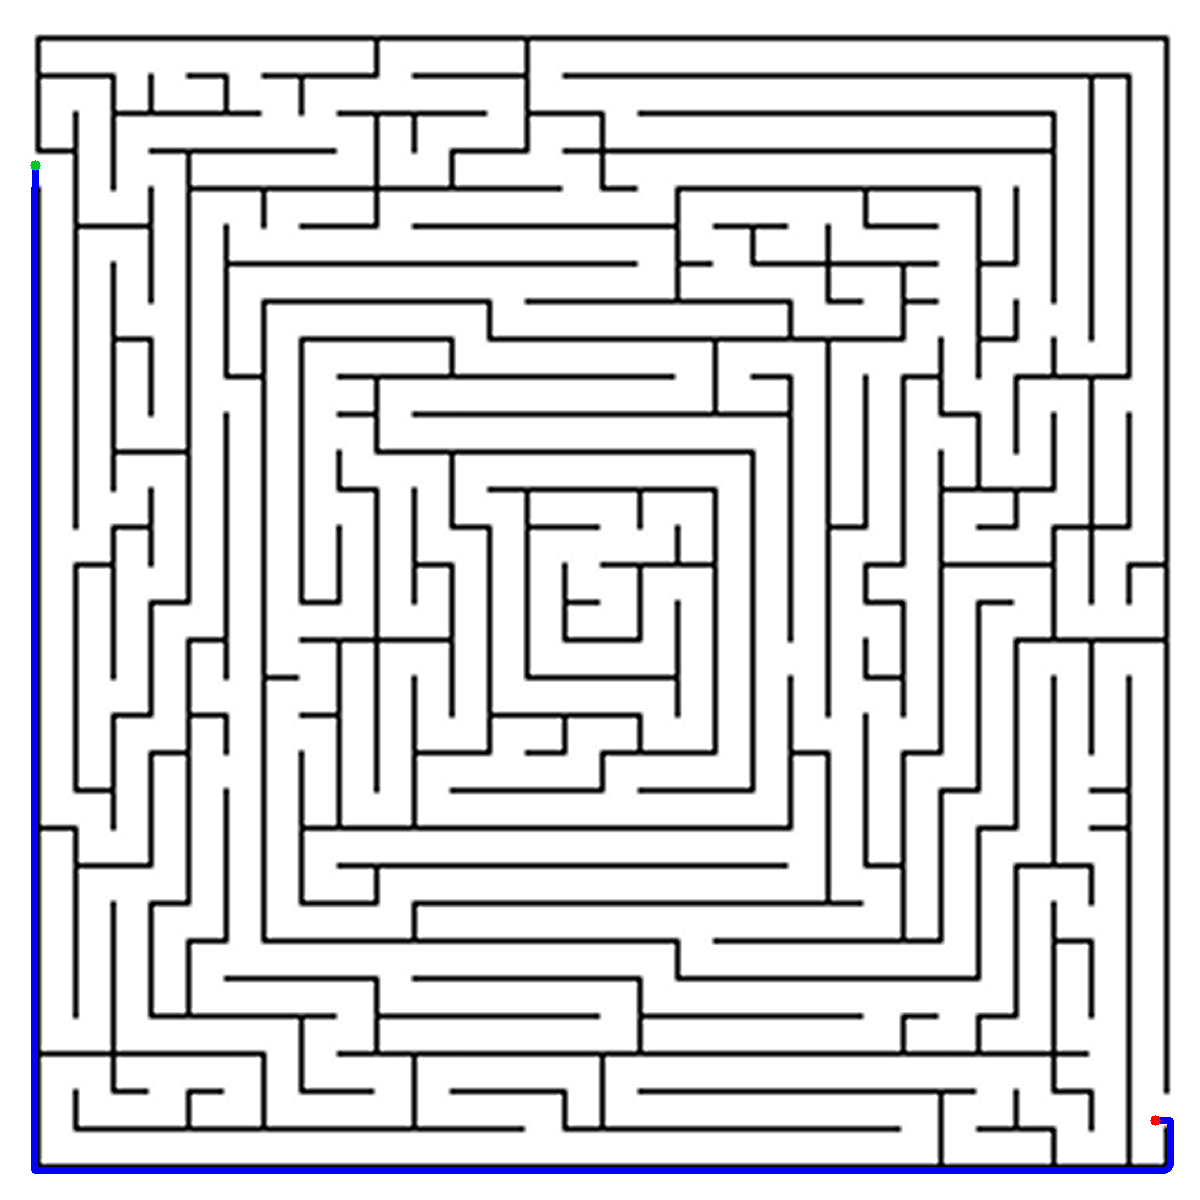

In [103]:
solve2 = solve_maze_bfs('maze_images/hard_maze2.png', 35, 165, 1155, 1120)
solve2

### Easy fix by cropping image

rows 1128
cols 1131
found
drawing path


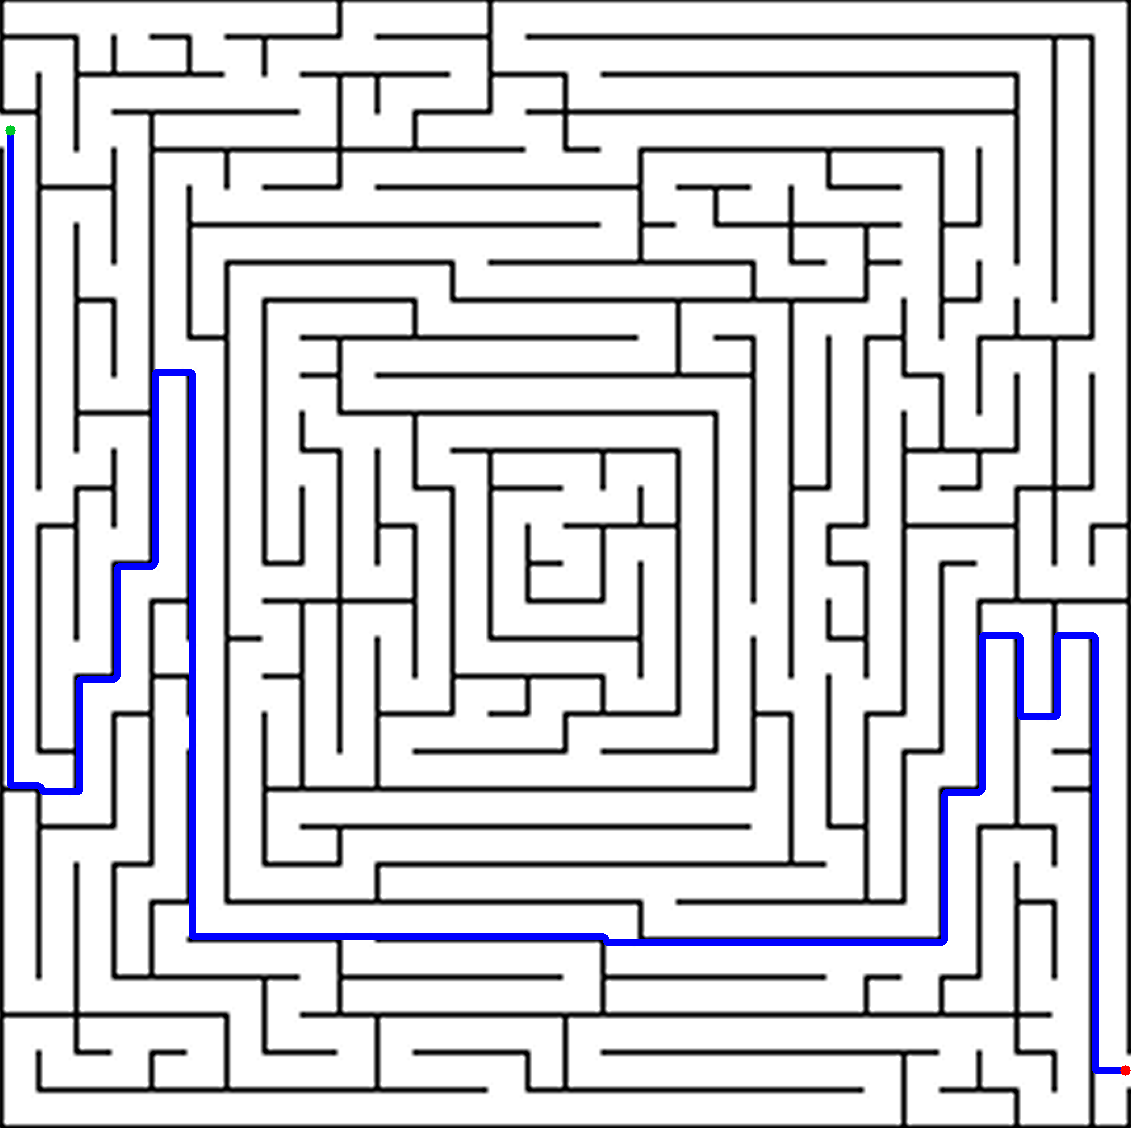

In [99]:
solve3 = solve_maze_bfs('maze_images/hard_maze2_cropped.png', 10, 130, 1125, 1070)
solve3

In [97]:
solve2.show()

rows 178
cols 283
found
drawing path


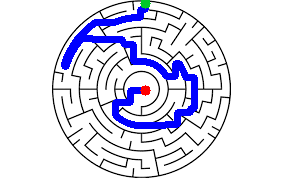

In [104]:
circle = solve_maze_bfs('maze_images/circle_maze.png',145,3,145,90)
circle